# Leader life expectancy
Data Analysis Python Pandas Data Manipulation Data Visualization Box Plot External Dataset

Suppose you have the following [dataset](https://docs.google.com/spreadsheets/d/1c-ggjDyeZ_ByKOe5J8mKkZViDo_FW8EYvzkCRQc-Ds0/edit#gid=1561619208)*, which is a list of leaders for all independent states in the world as outlined in Gleditsch and Ward.

With this data, for all leaders that have valid birth and death years, can you plot the life expectancy over time for these leaders?

Here I would probably recommend a box and whisker plot to show distributions over time in the same chart..

*[Dataset source](http://www.ksgleditsch.com/archigos.html)

Solution will be written in python for premium users.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

filename = 'q156_data_Archigos_ A Database of Political Leaders - 1March_Archigos_4.1.csv'
df = pd.read_csv(filename)
print('shape', df.shape)
print(df.columns)
df.head()

shape (3409, 24)
Index(['obsid', 'leadid', 'ccode', 'idacr', 'leader', 'startdate', 'enddate',
       'entry', 'exit', 'exitcode', 'prevtimesinoffice', 'posttenurefate',
       'gender', 'yrborn', 'yrdied', 'borndate', 'deathdate', 'dbpedia.uri',
       'num.entry', 'num.exit', 'num.exitcode', 'num.posttenurefate', 'fties',
       'ftcur'],
      dtype='object')


,obsid,leadid,ccode,idacr,leader,startdate,enddate,entry,exit,exitcode,...,yrdied,borndate,deathdate,dbpedia.uri,num.entry,num.exit,num.exitcode,num.posttenurefate,fties,ftcur
0,ECU-1869,3539f318-3bbd-11e5-afeb-eb6f07f9fec7,130,ECU,Gabriel García Moreno,1869-01-19,1875-08-06,Irregular,Irregular,Unknown,...,1875,1821-12-24,1875-08-06,http://dbpedia.org/resource/Gabriel_Garc%C3%AD...,1,3.0,-999,3.0,NaN,NaN
1,HAI-1874,81df6d19-1e42-11e4-b4cd-db5882bf8def,41,HAI,Rameau,1874-06-11,1876-04-15,Irregular,Irregular,"Removed by Military, without Foreign Support",...,1876,NaN,1876-04-15,NaN,1,3.0,6,3.0,NaN,NaN
2,LBR-1872,197863a8-3bbd-11e5-afeb-eb6f07f9fec7,450,LBR,Joseph Jenkins Roberts,1872-01-01,1875-06-27,Irregular,Retired Due to Ill Health,Regular,...,1876,NaN,NaN,http://dbpedia.org/resource/Joseph_Jenkins_Rob...,1,2.1,0,0.0,NaN,NaN
3,TUR-1861,823ce4cd-1e42-11e4-b4cd-db5882bf8def,640,TUR,Abdul Aziz,1861-06-25,1876-05-30,Regular,Irregular,Unknown,...,1876,NaN,1876-06-04,NaN,0,3.0,-999,3.0,NaN,NaN
4,PAR-1874,81fe84c0-1e42-11e4-b4cd-db5882bf8def,150,PAR,Gill,1874-11-25,1877-04-12,Irregular,Irregular,Unknown,...,1877,NaN,NaN,http://dbpedia.org/resource/Juan_Bautista_Gill,1,3.0,-999,3.0,NaN,NaN


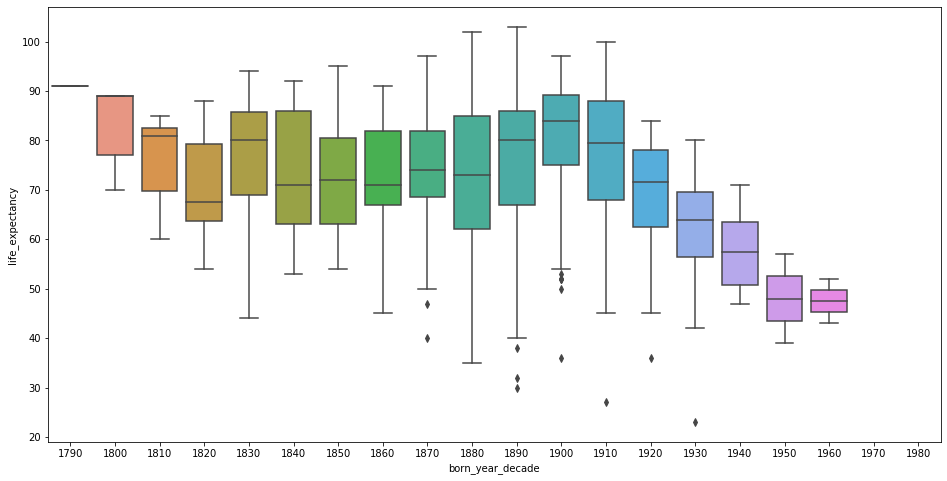

In [2]:
# df['born_year'] = pd.DatetimeIndex(df['borndate'], errors='coerce').year
df['born_year'] = pd.to_datetime(df['borndate'], errors='coerce').dt.year.astype('Int64')
df['death_year'] = pd.to_datetime(df['deathdate'], errors='coerce').dt.year.astype('Int64')
df['life_expectancy'] = df['death_year'] - df['born_year']
df['born_year_decade'] = (df['born_year'] - df['born_year'] % 10)

fig, ax = plt.subplots(figsize=(16,8)); 
boxplot = sns.boxplot(
    x='born_year_decade',
    y='life_expectancy',
    data=df,
    ax=ax
)
